In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import albumentations as A


Matplotlib is building the font cache; this may take a moment.


In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train =  tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [3]:
# Expand the dimensions of the images so that they can be fed into the model
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
(x_test.
shape)

(10000, 28, 28, 1)

In [6]:
augment = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.2),
])

In [7]:
# Data generator for the training set
def data_generator(x, y, batch_size=32):
    while True:
        for i in range(0, len(x), batch_size):
            x_batch, y_batch = x[i:i+batch_size], y[i:i+batch_size]
            x_batch_augmented = np.array([augment(image=img.reshape(28, 28))['image'].reshape(28, 28, 1) for img in x_batch])
            yield x_batch_augmented, y_batch


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/opt/anaconda3/envs/FIITSTU/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
def visualize_data_generator(x, y, batch_size=10):
    for i in range(0, len(x), batch_size):
        x_batch, y_batch = x[i:i+batch_size], y[i:i+batch_size]
        x_batch_augmented = np.array([augment(image=img.reshape(28, 28))['image'].reshape(28, 28, 1) for img in x_batch])
        yield x_batch, x_batch_augmented, y_batch

# Generate one batch of data
generator = visualize_data_generator(x_train, y_train)
original_images, augmented_images, labels = next(generator)

def plot_images(original_images, augmented_images, number_to_show=10):
    fig, axes = plt.subplots(nrows=number_to_show, ncols=2, figsize=(5, 2*number_to_show))
    for i in range(number_to_show):
        ax = axes[i, 0]
        ax.imshow(original_images[i].squeeze(), cmap='gray')
        ax.title.set_text('Original')
        ax.axis('off')

        ax = axes[i, 1]
        ax.imshow(augmented_images[i].squeeze(), cmap='gray')
        ax.title.set_text('Augmented')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [9]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generator
batch_size = 32
steps_per_epoch = len(x_train) // batch_size
model.fit(data_generator(x_train, y_train, batch_size), steps_per_epoch=steps_per_epoch, epochs=3)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8148 - loss: 0.6366
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9326 - loss: 0.2230
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1679
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9596 - loss: 0.1340
Test Accuracy: 0.9657999873161316
Test Loss: 0.11305026710033417


In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.9596 - loss: 0.1340


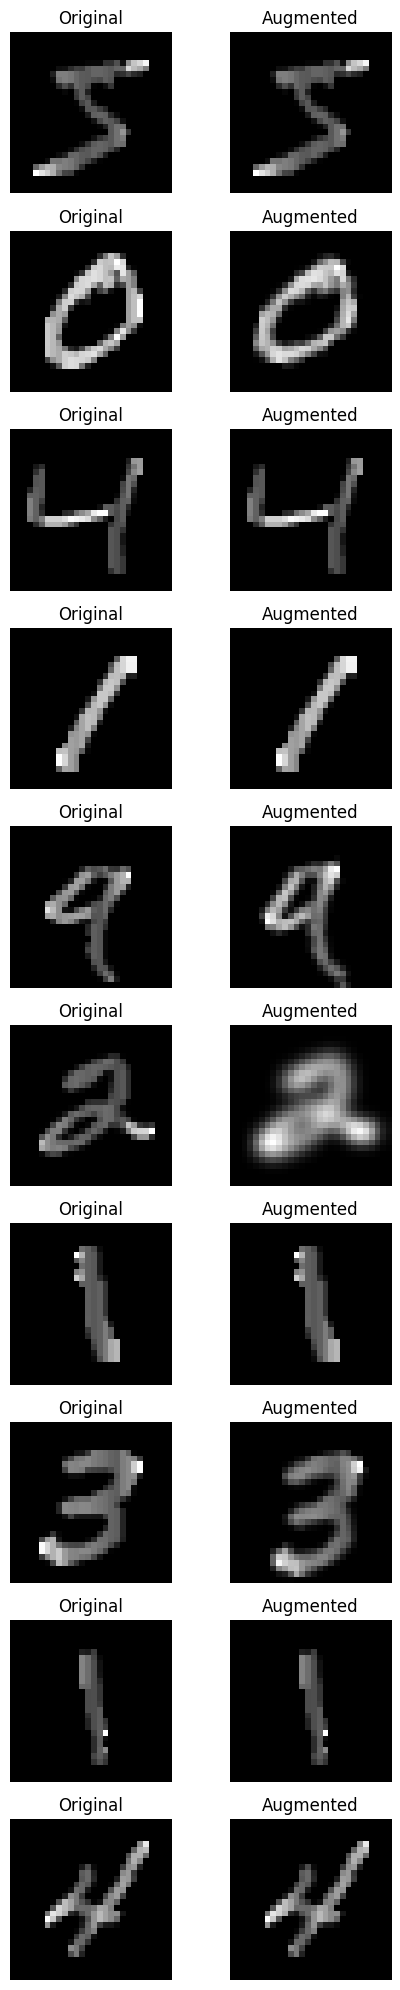

In [11]:

plot_images(original_images, augmented_images, number_to_show=10)

In [12]:
print(accuracy)

0.9657999873161316


In [13]:
print(loss)

0.11305026710033417


In [17]:
model.save('digits_model.h5')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=digits.model.

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255
  255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0 255 255 255 255
  255 255 255   0   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255
  255 255 255 255 255   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
  255 255 255 255 255   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
  255 255 255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 25

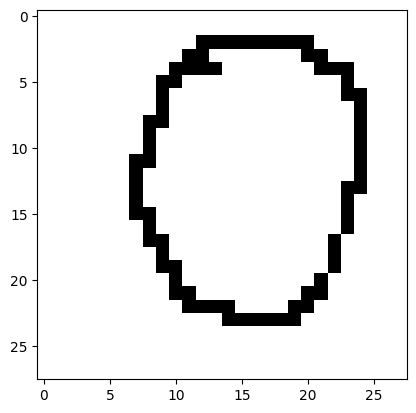

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0 255   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0 255 255   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 25

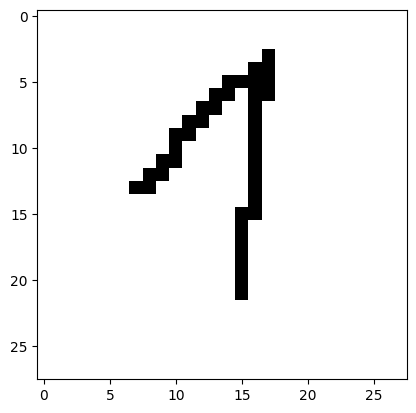

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 25

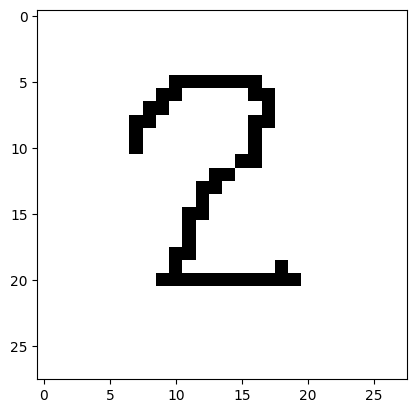

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0   0   0 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0   0 255 255   0   0   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 25

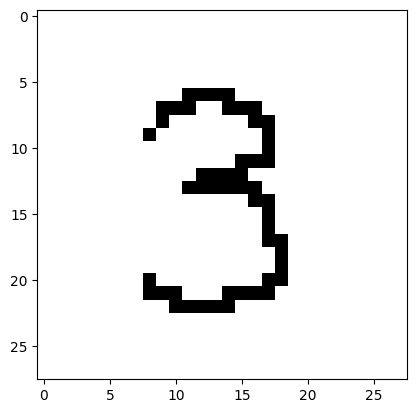

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 25

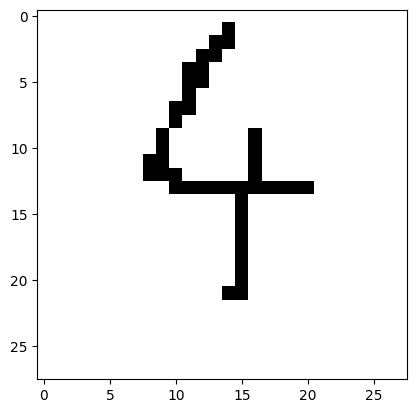

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0 255 255   0   0   0   0
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 25

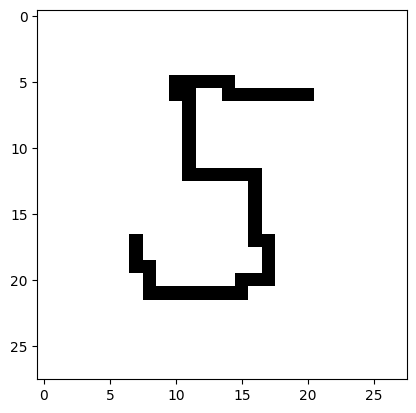

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 25

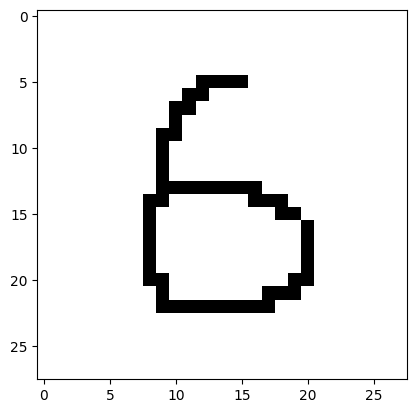

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255   0   0   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 25

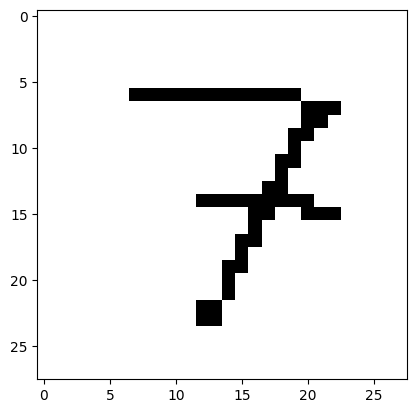

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0   0   0 255 255 255   0   0
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255   0
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 25

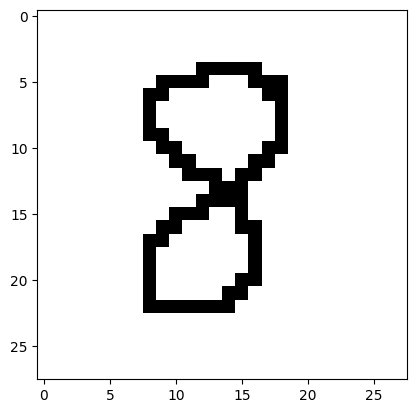

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0   0 255 255 255 255 255   0
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
    0   0 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255 255
    0   0 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255
    0   0 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 25

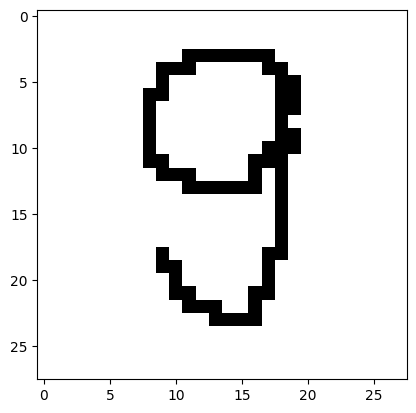

In [27]:
for i in range(10):
    img = cv.imread(f'../MyIMG/{i}.png')[:,:,0]
    print(img)
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'Prediction for {i} is {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

In [26]:
import os

print("Current working directory:", os.getcwd())
print("Contents of the image directory:", os.listdir('../MyIMG'))


Current working directory: /Users/kristianko/Documents/Uni/Bakalárska Práca/NeuralNetwork_Digits/DigitsRecognition/CNNs
Contents of the image directory: ['8.png', '9.png', '4.png', '5.png', '7.png', '6.png', '2.png', '3.png', '1.png', '0.png']
